In [1]:
import pandas as pd


plain = pd.read_csv("results/plain.csv")
native = pd.read_csv("results/opt3.csv")
invsum = pd.read_csv("results/invsum.csv")
ur2 = pd.read_csv("results/unroll2.csv")
ur4 = pd.read_csv("results/unroll4.csv")
fm = pd.read_csv("results/fastmath.csv")
avx = pd.read_csv("results/avx.csv")

df = plain
df.rename(columns={"time": "plain"}, inplace=True)
df["plain"] = df["plain"] * 1e6
df["native"] = native["time"] * 1e6
df["no-deps"] = invsum["time"] * 1e6
df["unroll2"] = ur2["time"] * 1e6
df["unroll4"] = ur4["time"] * 1e6
df["fast-math"] = fm["time"] * 1e6
df["avx"] = avx["time"] * 1e6
df

,elements,plain,native,no-deps,unroll2,unroll4,fast-math,avx
0,128,6.51334,5.97578,6.08652,6.01662,6.19252,6.44678,5.35452
1,256,9.81490,8.01244,7.69394,7.36806,7.56728,6.39900,9.97064
2,512,11.18920,10.33300,10.50920,10.37910,9.92114,7.63282,17.51350
3,1024,17.92690,16.52020,16.40650,15.48630,16.71890,10.34640,33.96140
4,2048,33.50510,26.40680,27.50560,25.09630,25.61980,16.61910,67.31220
5,4096,58.25560,48.06740,52.29540,47.29220,46.44780,23.15510,140.03700
6,8192,110.63300,92.22410,95.97900,88.71280,89.14720,37.24960,277.61800
7,16384,225.00000,183.02100,183.04100,177.22500,173.79500,70.26050,549.24300


In [2]:
# df["native_su"] = df["plain"] / df["native"]
# print(df.to_latex(header=True, index=False, float_format="%.4f"))
# df

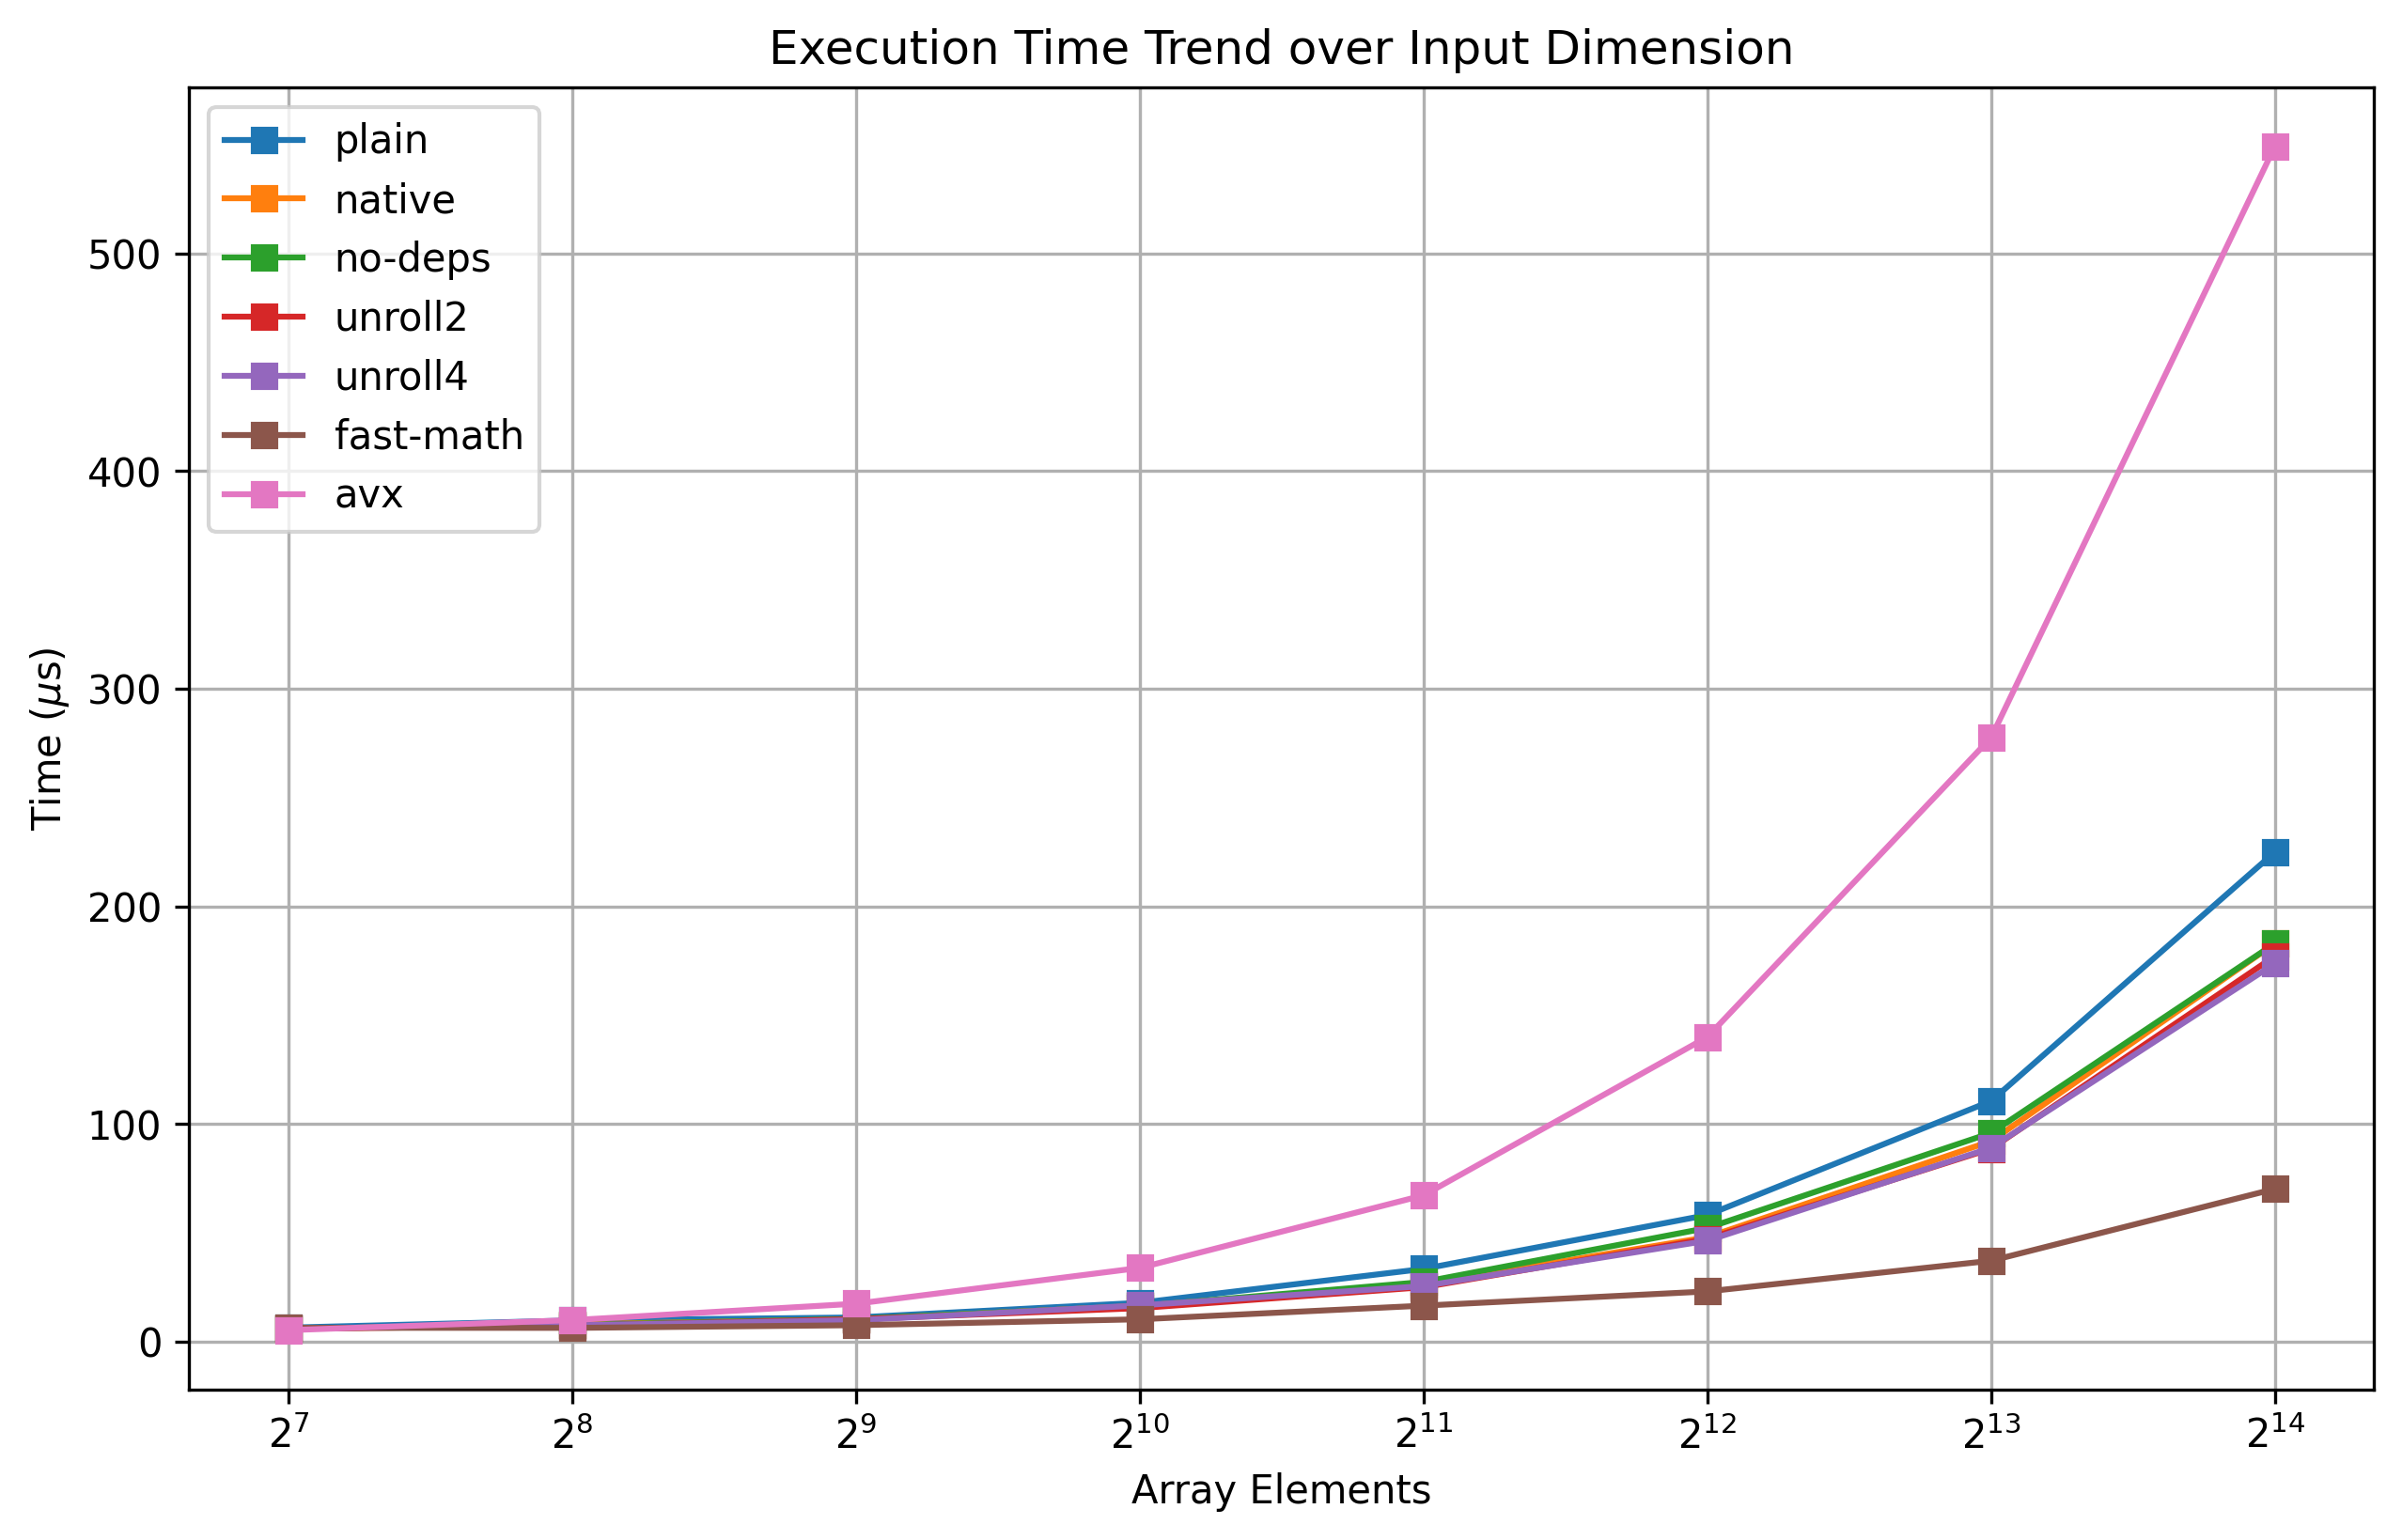

In [3]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6), dpi=300)
plt.title("Execution Time Trend over Input Dimension")

labels = [c for c in df.columns if c != "elements"]
for label in labels:
    plt.plot(df["elements"], df[label], marker="s", label=label)

plt.xlabel("Array Elements")
plt.ylabel(r"Time ($\mu$s)")

plt.xscale("log", base=2)
plt.grid()
plt.legend()
plt.savefig("time.svg")
plt.show()

In [4]:
speedup_df = df.copy()
for c in speedup_df.columns:
    if c != "elements":
        speedup_df[c] = df["plain"] / df[c]

speedup_df

,elements,plain,native,no-deps,unroll2,unroll4,fast-math,avx
0,128,1.0,1.089956,1.070125,1.082558,1.051808,1.010325,1.216419
1,256,1.0,1.224958,1.275666,1.332087,1.297018,1.533818,0.984380
2,512,1.0,1.082861,1.064705,1.078051,1.127814,1.465933,0.638890
3,1024,1.0,1.085150,1.092671,1.157597,1.072254,1.732670,0.527861
4,2048,1.0,1.268806,1.218119,1.335061,1.307781,2.016060,0.497757
5,4096,1.0,1.211957,1.113972,1.231823,1.254217,2.515886,0.416001
6,8192,1.0,1.199611,1.152679,1.247092,1.241015,2.970045,0.398508
7,16384,1.0,1.229367,1.229233,1.269573,1.294629,3.202368,0.409655


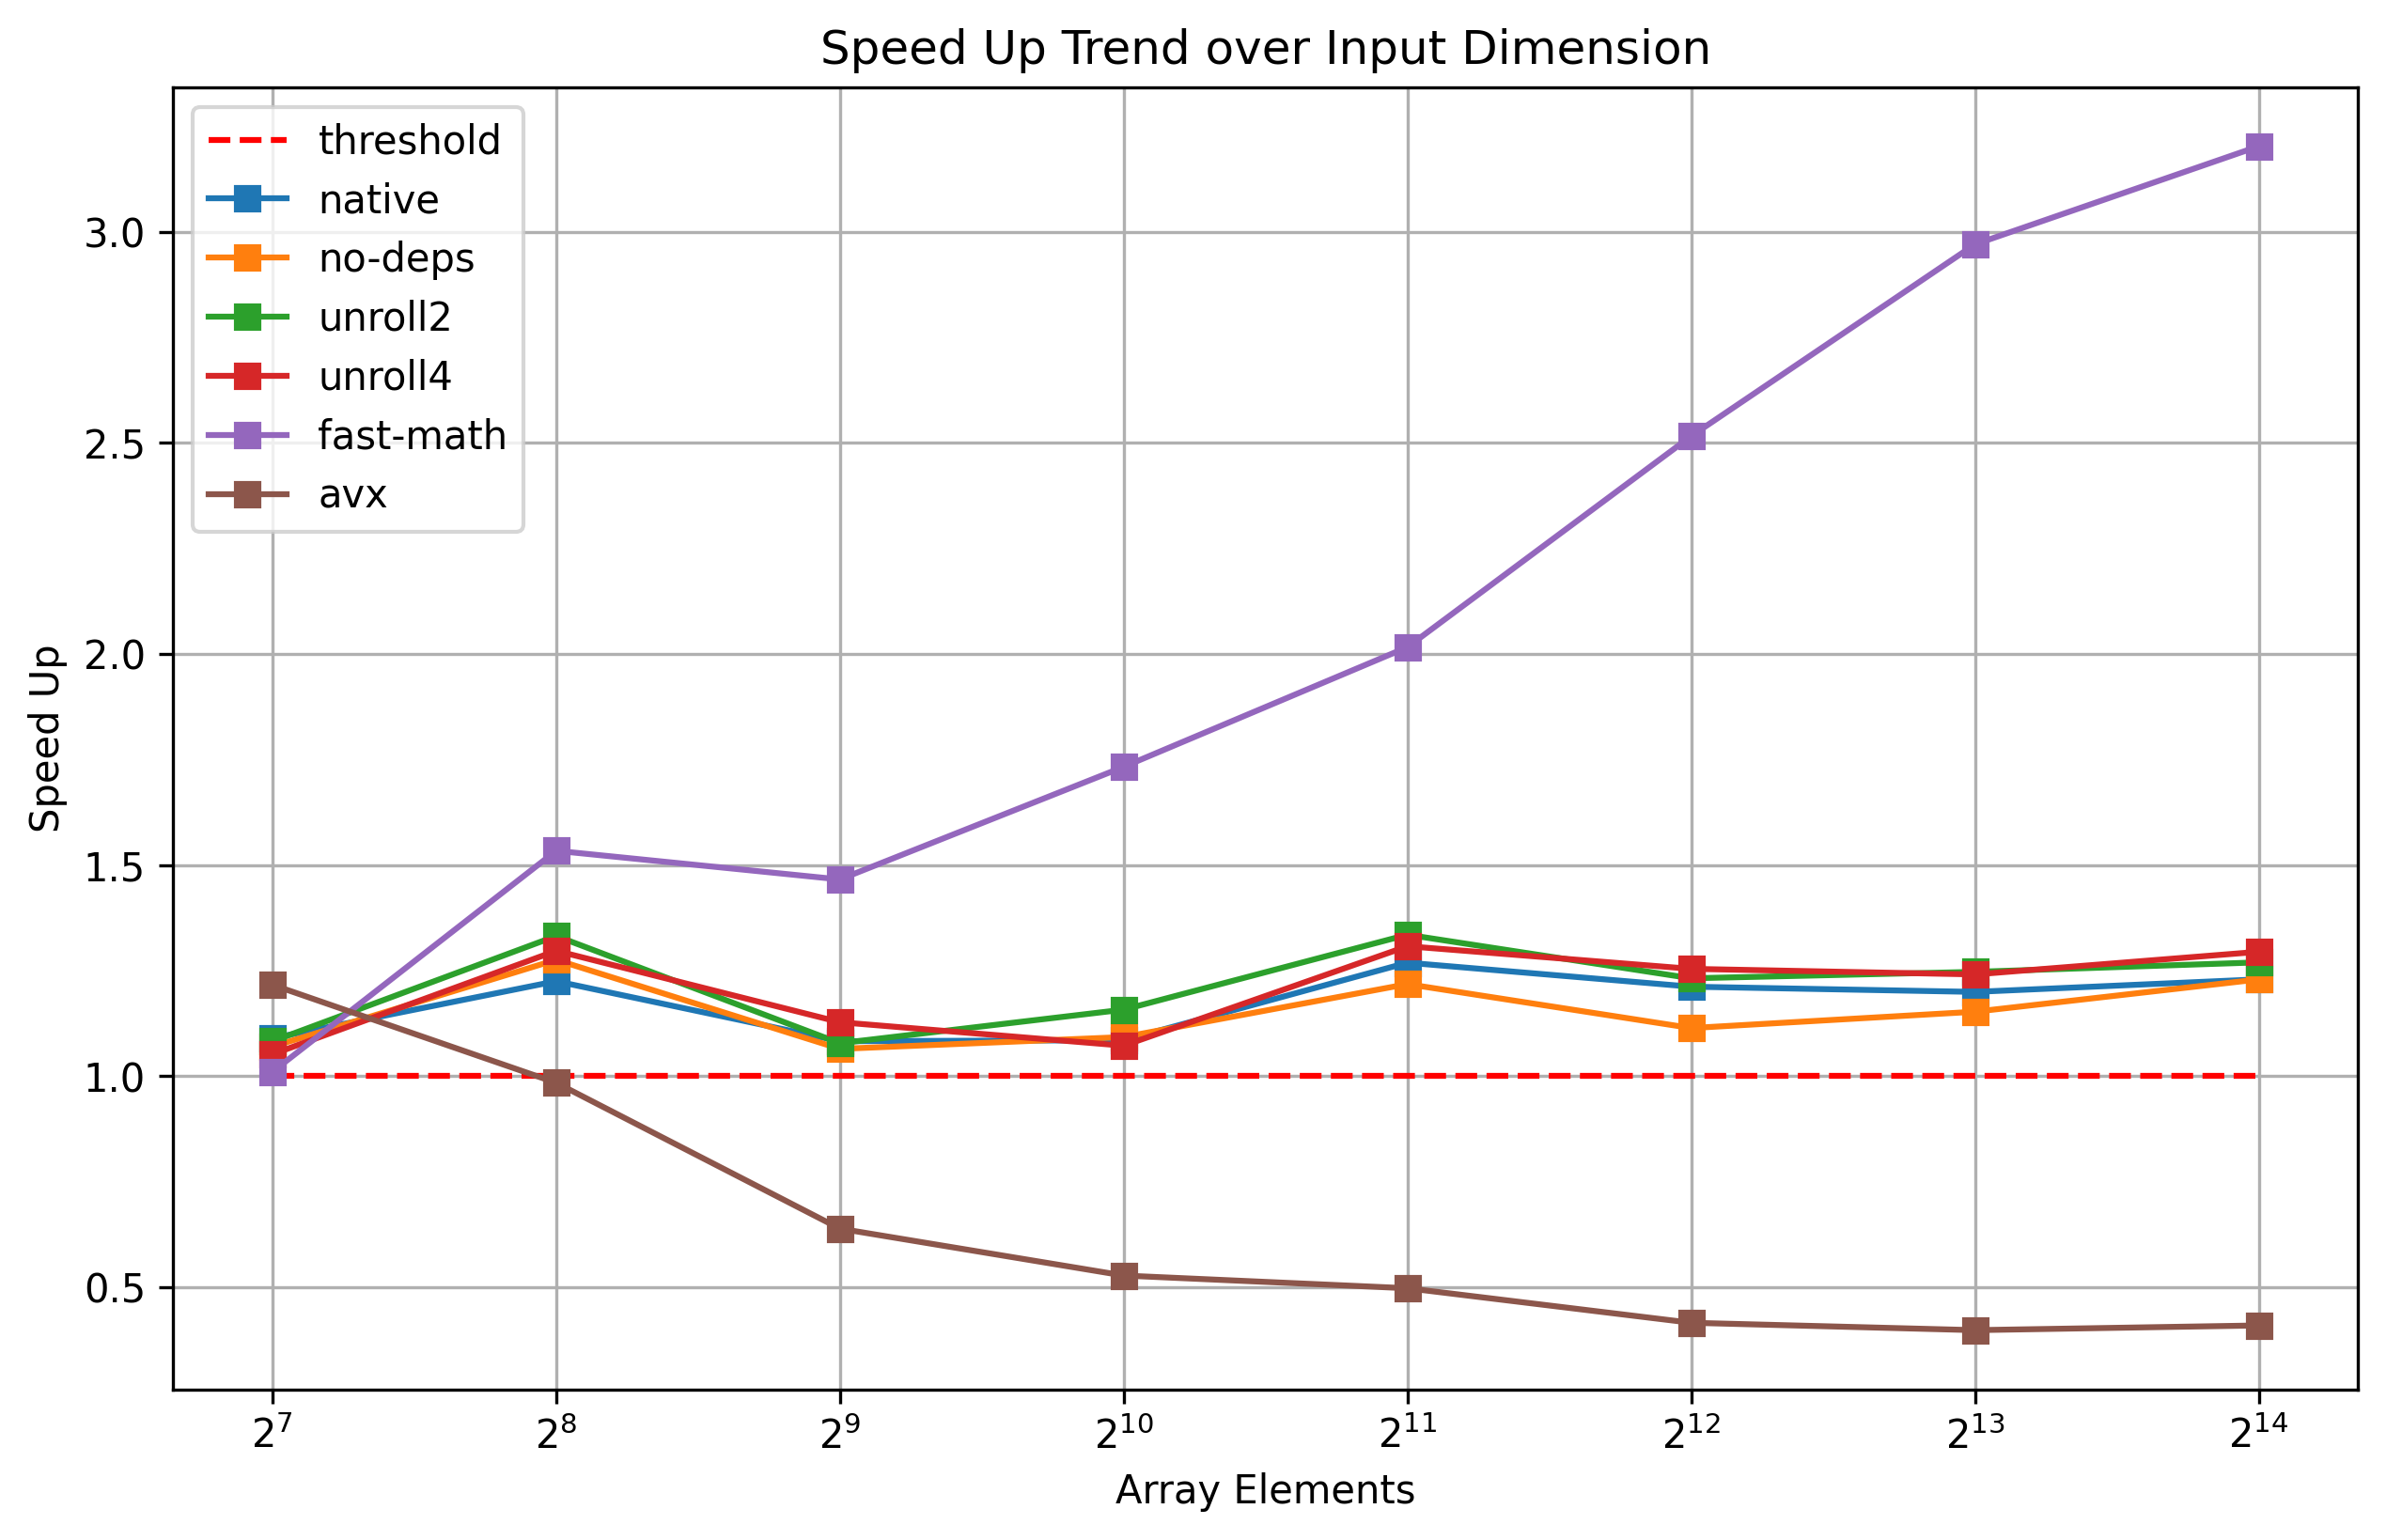

In [5]:
plt.figure(figsize=(10, 6), dpi=300)
plt.title("Speed Up Trend over Input Dimension")

# threshold of good speed up
plt.plot([128, 16384], [1.0, 1.0], "r--", label="threshold")

for label in labels:
    if label != "plain":
        plt.plot(speedup_df["elements"], speedup_df[label], marker="s", label=label)

plt.xlabel("Array Elements")
plt.ylabel("Speed Up")

plt.xscale("log", base=2)
plt.grid()
plt.legend()
plt.savefig("speed_up.svg")
plt.show()